# DATA SCIENTIST

**Content:**
1. Introduction to Python:
    1. Matplotlib
    1. Dictionaries 
    1. Pandas
    1. Logic, control flow and filtering
    1. Loop data structures
1. Python Data Science Toolbox:
    1. User defined function 
    1. Scope
    1. Nested function
    1. Default and flexible arguments
    1. Lambda function
    1. Anonymous function
    1. Iterators
    1. List comprehension
1. Cleaning Data
    1. Diagnose data for cleaning
    1. Explotary data analysis
    1. Visual exploratory data analysis
    1. Tidy data
    1. Pivoting data
    1. Concatenating data
    1. Data types
    1. Missing data and testing with assert
1. Pandas Foundation
    1. Review of pandas
    1. Building data frames from scratch
    1. Visual exploratory data analysis
    1. Statistical explatory data analysis
    1. Indexing pandas time series
    1. Resampling pandas time series
1. Manipulating Data Frames with Pandas
    1. Indexing data frames
    1. Slicing data frames
    1. Filtering data frames
    1. Transforming data frames
    1. Index objects and labeled data
    1. Hierarchical indexing
    1. Pivoting data frames
    1. Stacking and unstacking data frames
    1. Melting data frames
    1. Categoricals and groupby
1. Data Visualization
1. Machine Learning

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "data/pokemon-challenge"]).decode("utf8"))

combats.csv
pokemon.csv
tests.csv



In [103]:
data = pd.read_csv('data/pokemon-challenge/pokemon.csv')

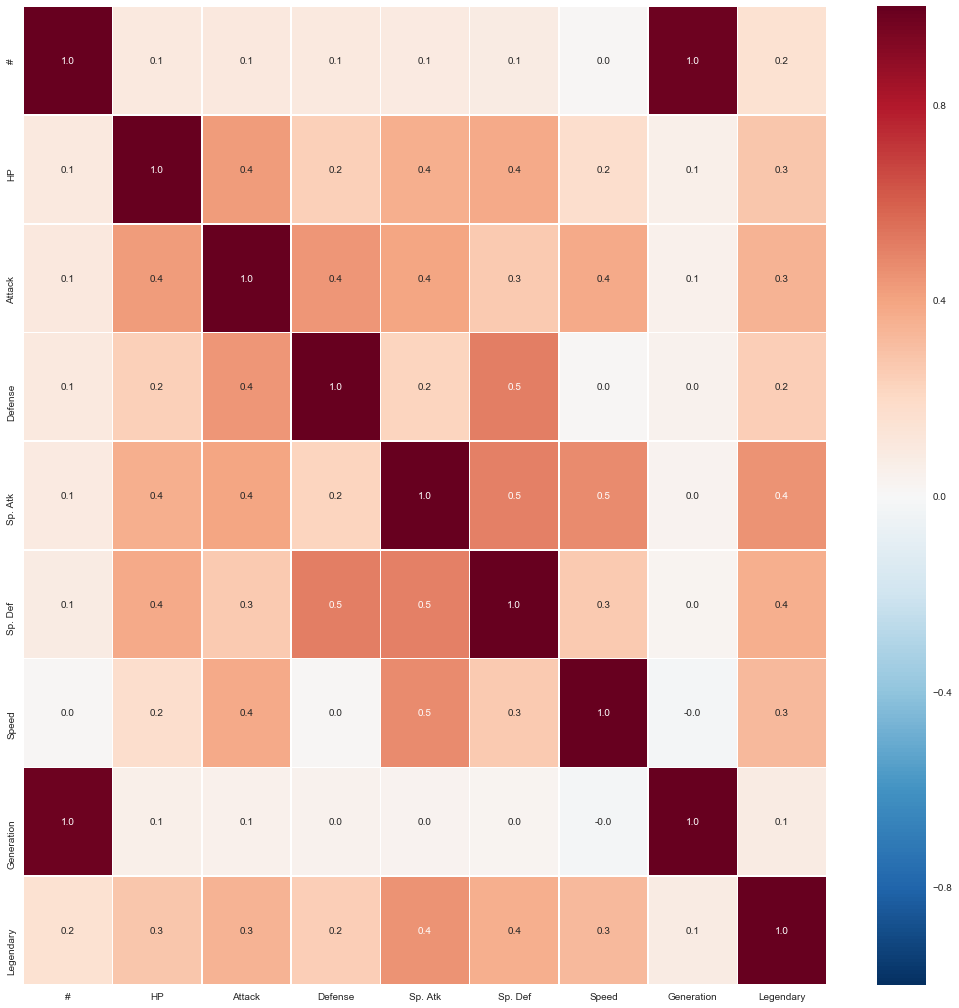

In [104]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# 1. INTRODUCTION

### MATPLOTLIB

* When x axis is time: LINE PLOT
* When there is correlation between two variables: SCATTER
* See distribution of numerical data: HISTOGRAM
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

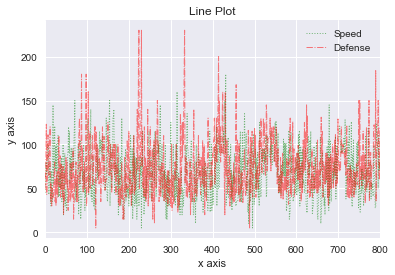

In [105]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')          

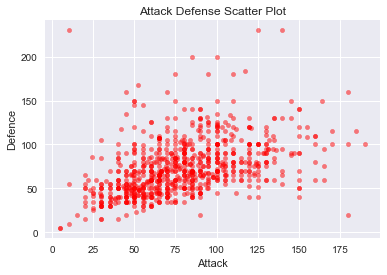

In [106]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')           

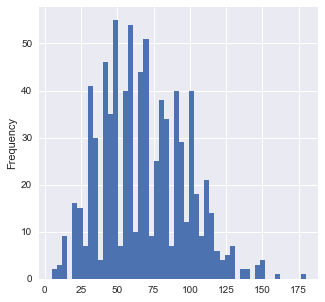

In [107]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (5,5))

In [108]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

### DICTIONARY

Some properties: keys(), values(), update, add, check, remove key, remove all entries and remove dicrionary.

In [109]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [110]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)


{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [114]:
# In order to run all code you need to take comment this line
del dictionary ;        # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

NameError: name 'dictionary' is not defined

### PANDAS

In [116]:
data = pd.read_csv('data/pokemon-challenge/pokemon.csv')

In [117]:
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [118]:
# Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [119]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### WHILE and FOR LOOPS
We will learn most basic while and for loops

In [120]:
lis = [1,2,3,4,5]

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['Attack']][0:1].iterrows():
    print(index," : ",value)

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Attack    49
Name: 0, dtype: int64


# 2. PYTHON DATA SCIENCE TOOLBOX

### USER DEFINED FUNCTION
What we need to know about functions:
* docstrings: documentation for functions. Example:
<br>for f():
    <br>"""This is docstring for documentation of function f"""
* tuble: sequence of immutable python objects. 
<br>cant modify values
<br>tuble uses paranthesis like tuble = (1,2,3)
<br>unpack tuble into several variables like a,b,c = tuble
    

In [121]:
# example of what we learn above
def tuble_ex():
    """ return defined t tuble"""
    t = (1,2,3)
    return t
a,b,c = tuble_ex()
print(a,b,c)

1 2 3


### SCOPE

* global: defined main body in script
* local: defined in a function
* built in scope: names in predefined built in scope module such as print, len

First local scopesearched, then global scope searched, if two of them cannot be found lastly built in scope searched.

In [122]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

### NESTED FUNCTION
* function inside function.
* There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

### DEFAULT and FLEXIBLE ARGUMENTS
* Default argument example:
<br> def f(a, b=1):
        """ b = 1 is default argument"""
* Flexible argument example:
<br> def f(*args):
       """ *args can be one or more"""
<br>def f(** kwargs)
       """ **kwargs is a dictionary"""

In [123]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

1

1
2
3
4
country   spain
capital   madrid
population   123456


### LAMBDA FUNCTION

In [124]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


### ANONYMOUS FUNCTİON
Like lambda function but it can take more than one arguments.
* map(func,seq) : applies a function to all the items in a list


In [125]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


### ITERATORS
* iterable is an object that can return an iterator
* iterable: an object with an associated iter() method
<br> example: list, strings and dictionaries
* iterator: produces next value with next() method

In [126]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

r
o n a l d o


zip(): zip lists

In [127]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
# [(1, 5), (2, 6), (3, 7), (4, 8)]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [128]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuble
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


### LIST COMPREHENSİON

In [129]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1 ]
print(num2)

[2, 3, 4]


In [130]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [131]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


# 3.CLEANING DATA

### DIAGNOSE DATA for CLEANING

Unclean data:
* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

<br> We will use head, tail, columns, shape and info methods to diagnose data


In [132]:
data = pd.read_csv('data/pokemon-challenge/pokemon.csv')
data.head() 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [133]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [134]:
# columns gives column names of features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [135]:
# shape gives number of rows and columns in a tuble
data.shape

(800, 12)

In [136]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


### EXPLOTARY DATA ANALYSIS
value_counts(): Frequency counts
<br>outliers: the value that is considerably higher or lower from rest of the data
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1) 

In [137]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [138]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


###VISUAL EXPLORATORY DATA ANALYSIS
* Visualize basic statistics like outliers, min/max or quantiles: BOX PLOT

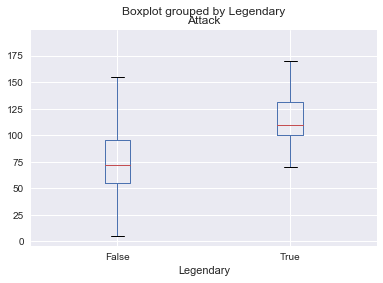

In [140]:
# For example: compare attack of pokemons that are legendary  or not
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

### TIDY DATA
We tidy data with melt().

In [141]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [142]:
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


### PIVOTING DATA
Reverse of melting.

In [143]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


### CONCATENATING DATA
We can concatenate two dataframe 

In [144]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [145]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


### DATA TYPES
There are 5 basic data types: object(string),booleab,  integer, float and categorical.
<br> Why is category important: 
* make dataframe smaller in memory 
* can be utilized for anlaysis especially for sklear(we will learn later)

In [146]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [147]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [148]:
# As you can see Type 1 is converted from object to categorical
# And Speed ,s converted from int to float
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

### MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean
<br>Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [149]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [150]:
# Lets chech Type 2
data["Type 2"].value_counts(dropna =False)
# As you can see, there are 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [151]:
data1 = data
data1["Type 2"].dropna(inplace = True)
data1["Type 2"].value_counts(dropna =False)

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ice         14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [152]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

In [153]:
# In order to run all code, we need to make this line comment
# assert 1==2 # return error because it is false

In [154]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [155]:
data["Type 2"].fillna('empty',inplace = True)

In [156]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [157]:
# # With assert statement we can check a lot of thing. For example
assert data.columns[1] == 'Name'
assert data.Speed.dtypes == np.int

AssertionError: 

# 4. PANDAS FOUNDATION 

### REVİEW of PANDAS

* single column = series
* NaN = not a number
* dataframe.values = numpy


### BUILDING DATA FRAMES FROM SCRATCH
* Build data frames from csv.
* Build dataframe from dictionaries
    * zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [159]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [160]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [161]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


### VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuble): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

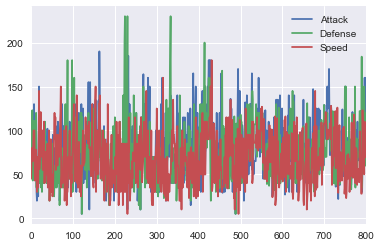

In [162]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1234fb4e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x123430f60>], dtype=object)

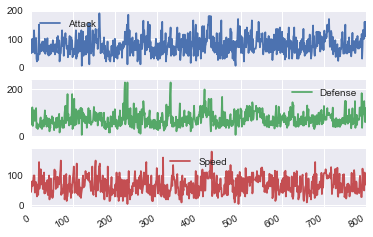

In [163]:
# subplots
data1.plot(subplots = True)

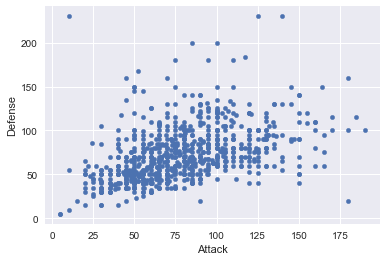

In [164]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")

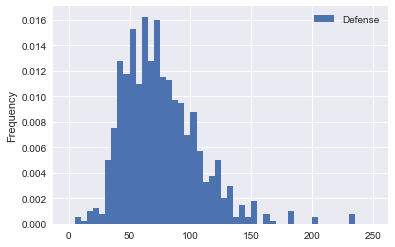

In [165]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)

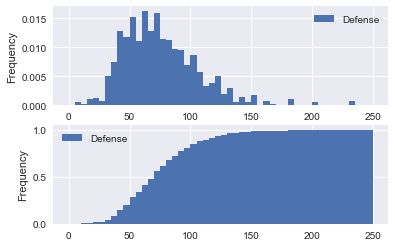

In [166]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)

### STATISTICAL EXPLORATORY DATA ANALYSIS

In [167]:
# data.describe()

### INDEXING PANDAS TIME SERIES
* datetime = object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [168]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [169]:
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# make date as index
data2= data2.set_index("date")
data2 

/Users/doris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [170]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100   80.0           1      False  
1993-03-15      120   80.0           1      False  
1993-03-16       50   65.0           1      False  


### RESAMPLING PANDAS TIME SERIES
* Resampling: statistical method over different time intervals
    * Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’ 
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html


In [171]:
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [172]:
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [173]:
# Resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False
1992-04-30,3.083333,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN
1992-05-31,3.166667,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN
1992-06-30,3.250000,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN
1992-07-31,3.333333,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN
1992-08-31,3.416667,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN
1992-09-30,3.500000,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN


In [175]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


# MANIPULATING DATA FRAMES WITH PANDAS

### INDEXING DATA FRAMES
* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [176]:
# read data
data = pd.read_csv('data/pokemon-challenge/pokemon.csv')
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [177]:
# indexing using square brackets
data["HP"][1]

45

In [178]:
# using column attribute and row label
data.HP[1]

45

In [179]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [180]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
6,58,64
7,78,84
8,78,130
9,78,104


### SLICING DATA FRAME
* Difference between selecting columns
    * Series and data frames
* Slicing and indexing series
* Reverse slicing 
* From something to end

In [181]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [182]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [183]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [184]:
# From something to end
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


### FILTERING DATA FRAMES

In [185]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [186]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [187]:
# Filtering column based others
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

### TRANSFORMING DATA
* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns

In [188]:
# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [189]:
# Use lambda function
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [190]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


### INDEX OBJECTS AND LABELED DATA
index: sequence of label


In [191]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [192]:
# Overwrite index
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,900,1)
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [193]:
# We can make one of the column as index. I actually did it at the beginning of manipulating data frames with pandas section
# It was like this
# data= data.set_index("#")
# also you can use data.index = data["#"]

### HIERARCHICAL INDEXING
* Setting indexing

In [194]:
data = pd.read_csv('data/pokemon-challenge/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [195]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

#              Name   HP  Attack  Defense  Sp. Atk  \
Type 1   Type 2                                                          
Grass    Poison     1         Bulbasaur   45      49       49       65   
         Poison     2           Ivysaur   60      62       63       80   
         Poison     3          Venusaur   80      82       83      100   
         Poison     4     Mega Venusaur   80     100      123      122   
Fire     NaN        5        Charmander   39      52       43       60   
         NaN        6        Charmeleon   58      64       58       80   
         Flying     7         Charizard   78      84       78      109   
         Dragon     8  Mega Charizard X   78     130      111      130   
         Flying     9  Mega Charizard Y   78     104       78      159   
Water    NaN       10          Squirtle   44      48       65       50   
         NaN       11         Wartortle   59      63       80       65   
         NaN       12         Blastoise   79      83      100       85   
         NaN       13    Mega Blastoise   79     103      120      135   
Bug      NaN       14          Caterpie   45      30       35       20   
         NaN       15           Metapod   50      20       55       25   
         Flying    16        Butterfree   60      45       50       90   
         Poison    17            Weedle   40      35       30       20   
         Poison    18            Kakuna   45      25       50       25   
         Poison    19          Beedrill   65      90       40       45   
         Poison    20     Mega Beedrill   65     150       40       15   
Normal   Flying    21            Pidgey   40      45       40       35   
         Flying    22         Pidgeotto   63      60       55       50   
         Flying    23           Pidgeot   83      80       75       70   
         Flying    24      Mega Pidgeot   83      80       80      135   
         NaN       25           Rattata   30      56       35       25   
         NaN       26          Raticate   55      81       60       50   
         Flying    27           Spearow   40      60       30       31   
         Flying    28            Fearow   65      90       65       61   
Poison   NaN       29             Ekans   35      60       44       40   
         NaN       30             Arbok   60      85       69       65   
...               ...               ...  ...     ...      ...      ...   
Psychic  NaN       71          Alakazam   55      50       45      135   
         NaN       72     Mega Alakazam   55      50       65      175   
Fighting NaN       73            Machop   70      80       50       35   
         NaN       74           Machoke   80     100       70       50   
         NaN       75           Machamp   90     130       80       65   
Grass    Poison    76        Bellsprout   50      75       35       70   
         Poison    77        Weepinbell   65      90       50       85   
         Poison    78        Victreebel   80     105       65      100   
Water    Poison    79         Tentacool   40      40       35       50   
         Poison    80        Tentacruel   80      70       65       80   
Rock     Ground    81           Geodude   40      80      100       30   
         Ground    82          Graveler   55      95      115       45   
         Ground    83             Golem   80     120      130       55   
Fire     NaN       84            Ponyta   50      85       55       65   
         NaN       85          Rapidash   65     100       70       80   
Water    Psychic   86          Slowpoke   90      65       65       40   
         Psychic   87           Slowbro   95      75      110      100   
         Psychic   88      Mega Slowbro   95      75      180      130   
Electric Steel     89         Magnemite   25      35       70       95   
         Steel     90          Magneton   50      60       95      120   
Normal   Flying    91        Farfetch'd   52      65       55       58   
         Flying    92   

### PIVOTING DATA FRAMES
* pivoting: reshape tool

In [196]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,age,gender,response,treatment
0,15,F,10,A
1,4,M,45,A
2,72,F,5,B
3,65,M,9,B


In [197]:
# pivoting
df.pivot(index="treatment",columns = "gender",values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


### STACKING and UNSTACKING DATAFRAME
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [198]:
df1 = df.set_index(["treatment","gender"])
df1
# lets unstack it

age  response
treatment gender               
A         F        15        10
          M         4        45
B         F        72         5
          M        65         9

In [199]:
# level determines indexes
df1.unstack(level=0)

age     response   
treatment   A   B        A  B
gender                       
F          15  72       10  5
M           4  65       45  9

In [200]:
df1.unstack(level=1)

age     response    
gender      F   M        F   M
treatment                     
A          15   4       10  45
B          72  65        5   9

In [201]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,age,response
gender,treatment,,
F,A,15,10
M,A,4,45
F,B,72,5
M,B,65,9


### MELTING DATA FRAMES
* Reverse of pivoting

In [202]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


### CATEGORICALS AND GROUPBY

In [203]:
df

,age,gender,response,treatment
0,15,F,10,A
1,4,M,45,A
2,72,F,5,B
3,65,M,9,B


In [204]:
# according to treatment take means of other features
df.groupby("treatment").mean()   # mean is aggregation / reduction method
# there are other methods like sum, std,max or min

,age,response
treatment,,
A,9.5,27.5
B,68.5,7.0


In [205]:
# we can only choose one of the feature
df.groupby("treatment").age.mean() 

treatment
A     9.5
B    68.5
Name: age, dtype: float64

In [206]:
# Or we can choose multiple features
df.groupby("treatment")[["age","response"]].mean() 

,age,response
treatment,,
A,9.5,27.5
B,68.5,7.0


In [207]:
df.info()
# as you can see gender is object
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
df["gender"] = df["gender"].astype("category")
df["treatment"] = df["treatment"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
age          4 non-null int64
gender       4 non-null object
response     4 non-null int64
treatment    4 non-null object
dtypes: int64(2), object(2)
memory usage: 208.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
age          4 non-null int64
gender       4 non-null category
response     4 non-null int64
treatment    4 non-null category
dtypes: category(2), int64(2)
memory usage: 344.0 bytes
